#Implementing Paper
[Return Differences between Trading and Non-trading Hours: Like Night and Day](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1004081)

Comparing Day and Night strategy

##Idea


Night Strategy


*   Buy at market close

*   Sell at the next day's open

*   Captures overnight return using:


```python
# Return = (Next Day's Open / Today's Close) - 1
df["Return"] = df["Open"] / df["Close"].shift(1) - 1

```

Day Strategy


*   Buy at market open

*   Sell at the same day's close

*   Captures day return using:


```python
# Return = (Today's Close / Today's Open) - 1
df["Return"] = df["Close"] / df["Open"] - 1

```




##Code

###Importing libraries

In [95]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display
plt.style.use(['dark_background'])

###Downloading data for Apple , Amazon and NIFTY50

---



In [96]:
start = '2010-01-01'
end = '2023-12-31'

# Nifty

df = yf.download("^NSEI", start= start , end= end , progress=False)
df.dropna(inplace=True)

# Adding Return column

df['Night Return'] = df['Open'].shift(-1) / df['Close'] - 1
df['Day Return'] = df["Close"] / df["Open"] - 1

# Cumulative

df["Night_Cum"] = (1 + df["Night Return"]).cumprod()
df["Day_Cum"] = (1 + df["Day Return"]).cumprod()

# Apple and Amazon

stocks = ['AAPL', 'AMZN']


data = {}
for ticker in stocks:
    df_1 = yf.download(ticker, start=start, end=end , progress=False)
    df_1['Night Return'] = df_1['Open'].shift(-1) / df_1['Close'] - 1
    df_1['Day Return'] = df_1["Close"] / df_1["Open"] - 1
    # Cumulative
    df_1["Night_Cum"] = (1 + df_1["Night Return"]).cumprod()
    df_1["Day_Cum"] = (1 + df_1["Day Return"]).cumprod()
    data[ticker] = df_1

In [97]:
df.head()

Price,Close,High,Low,Open,Volume,Night Return,Day Return,Night_Cum,Day_Cum
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,
Date,,,,,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0,0.008591,0.006018,1.008591,1.006018
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0,0.000047,0.000142,1.008639,1.006161
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0,0.000000,0.000692,1.008639,1.006857
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0,0.000218,-0.003540,1.008859,1.003292
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0,0.003632,-0.003704,1.012523,0.999576


In [98]:
df_1.head()

Price,Close,High,Low,Open,Volume,Night Return,Day Return,Night_Cum,Day_Cum
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,,,
Date,,,,,,,,,
2010-01-04,6.6950,6.8305,6.6570,6.8125,151998000,-0.003510,-0.017248,0.996490,0.982752
2010-01-05,6.7345,6.7740,6.5905,6.6715,177038000,-0.000668,0.009443,0.995824,0.992033
2010-01-06,6.6125,6.7365,6.5825,6.7300,143576000,-0.001815,-0.017459,0.994017,0.974713
2010-01-07,6.5000,6.6160,6.4400,6.6005,220604000,0.004308,-0.015226,0.998299,0.959871
2010-01-08,6.6760,6.6840,6.4515,6.5280,196610000,-0.006741,0.022672,0.991570,0.981633


###Sharpe and Plot for Apple+Amazon in any proportion




**What is Sharpe ratio?**


The Sharpe Ratio is a popular metric used to evaluate the risk-adjusted return of an investment or trading strategy.
It tells you how much excess return you're getting per unit of risk.


In [107]:
def sharpe(returns):
    mean = returns.mean() * 252
    volatility = returns.std() * np.sqrt(252)
    sharpe = mean / volatility
    return round(sharpe, 4)

Give desired ratio as input i.e. 0.75 of Apple

In [100]:
ratio = 0  # Initial ratio value

@interact(number=(0, 1,0.01))
def get_ratio(number):
    global ratio
    ratio = number
    print(f"Ratio stored: {ratio}")


interactive(children=(FloatSlider(value=0.0, description='number', max=1.0, step=0.01), Output()), _dom_classe…

Code for getting Sharpe and plot for the given input ratio

In [108]:
# Changing Night Return according to the input ratio
Night = pd.DataFrame({
    'AAPL': data['AAPL']['Night Return']*ratio,
    'AMZN': data['AMZN']['Night Return']*(1-ratio),
})

Night['Strategy_1'] = Night.mean(axis=1)
Night['Night_Cum'] = (1 + Night['Strategy_1']).cumprod() # new cumulative for given ratio

In [109]:
# Changing Day Return according to the input ratio
Day = pd.DataFrame({
    'AAPL': data['AAPL']['Day Return']*ratio,
    'AMZN': data['AMZN']['Day Return']*(1-ratio),
})

Day['Strategy_2'] = Day.mean(axis=1)
Day['Day_Cum'] = (1 + Day['Strategy_2']).cumprod() # new cumulative for given ratio

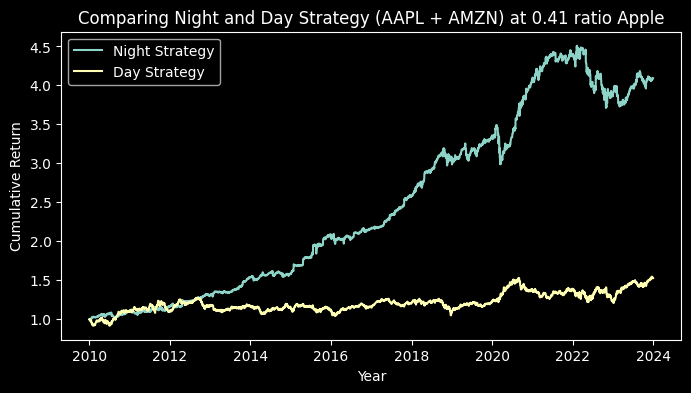

In [110]:
# Plotting Returns

plt.figure(figsize=(8, 4))
plt.plot(Night['Night_Cum'], label='Night Strategy')
plt.plot(Day['Day_Cum'], label='Day Strategy')
plt.title(f'Comparing Night and Day Strategy (AAPL + AMZN) at {ratio} ratio Apple')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend()
# plt.grid(True)
plt.show()

In [111]:
# Calculate Sharpe Ratio (daily)
# sharpe_ratio_night = (Night['Strategy_1'].mean() / Night['Strategy_1'].std()) * np.sqrt(252)
sharpe_ratio_night = sharpe(Night['Strategy_1'])

sharpe_ratio_day = sharpe(Day['Strategy_2'])

print(f"Sharpe Ratio: {sharpe_ratio_night}")
print(f"Sharpe Ratio: {sharpe_ratio_day}")

Sharpe Ratio: 1.1979
Sharpe Ratio: 0.3342


###Checking the strategy for NIFTY50
Comparing the strategy to Indian Market

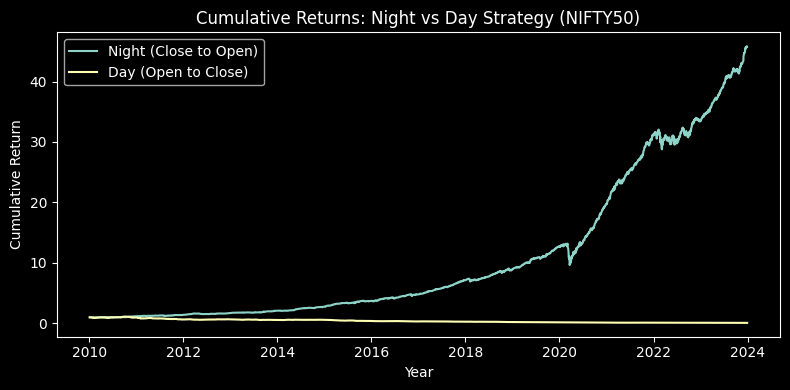

In [112]:
# Plot
plt.figure(figsize=(8, 4))
plt.plot(df.index, df["Night_Cum"], label="Night (Close to Open)")
plt.plot(df.index, df["Day_Cum"], label="Day (Open to Close)")
plt.title("Cumulative Returns: Night vs Day Strategy (NIFTY50)")
plt.xlabel("Year")
plt.ylabel("Cumulative Return")
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

In [113]:
# Sharpe Ratio

night_sharpe = sharpe(df["Night Return"])
day_sharpe = sharpe(df["Day Return"])

print("Night Strategy: ", night_sharpe)
print("Day Strategy: ", day_sharpe)


Night Strategy:  2.945
Day Strategy:  -1.1594
